In [106]:
#importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from sklearn.mixture import GaussianMixture
from sklearn.metrics.cluster import rand_score
from scipy.stats import mode
import pickle
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
#load the datset
df = pd.read_csv("covtype_train.csv")

In [3]:
df

,Elevation,Aspect,Slope,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Fire_Points,Soil_Type,Wilderness,target
0,elevation_medium,aspect_medium,slope_low,hillshade_9am_max,hillnoon_max,0,1,low,22,0,2
1,elevation_high,aspect_medium,slope_low,hillshade_9am_max,hillnoon_max,1,1,mid,32,2,1
2,elevation_medium,aspect_low,slope_low,hillshade_9am_max,hillnoon_max,1,1,low,10,2,2
3,elevation_high,aspect_ultra,slope_medium,hillshade_9am_max,hillnoon_max,2,1,low,23,2,1
4,elevation_high,aspect_high,slope_low,hillshade_9am_max,hillnoon_max,2,1,mid,28,0,2
...,...,...,...,...,...,...,...,...,...,...,...
406703,elevation_ultra,aspect_medium,slope_low,hillshade_9am_max,hillnoon_max,1,1,mid,39,0,7
406704,elevation_medium,aspect_low,slope_medium,hillshade_9am_max,hillnoon_max,0,1,mid,28,0,2
406705,elevation_medium,aspect_medium,slope_low,hillshade_9am_max,hillnoon_max,0,1,mid,28,0,2
406706,elevation_high,aspect_high,slope_low,hillshade_9am_max,hillnoon_max,2,2,low,28,0,2


In [4]:
#checking the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406708 entries, 0 to 406707
Data columns (total 11 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Elevation                           406708 non-null  object
 1   Aspect                              406708 non-null  object
 2   Slope                               406708 non-null  object
 3   Hillshade_9am                       406708 non-null  object
 4   Hillshade_Noon                      406708 non-null  object
 5   Horizontal_Distance_To_Hydrology    406708 non-null  int64 
 6   Vertical_Distance_To_Hydrology      406708 non-null  int64 
 7   Horizontal_Distance_To_Fire_Points  406708 non-null  object
 8   Soil_Type                           406708 non-null  int64 
 9   Wilderness                          406708 non-null  int64 
 10  target                              406708 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 34

In [5]:
#checking the target labels
df.groupby('target').size()

target
1    148288
2    198310
3     25028
4      1923
5      6645
6     12157
7     14357
dtype: int64

In [6]:
df.shape

(406708, 11)

In [7]:
#check if any null values
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Hillshade_9am                         0
Hillshade_Noon                        0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Fire_Points    0
Soil_Type                             0
Wilderness                            0
target                                0
dtype: int64

In [8]:
#drop duplicate values in dataframe
df.drop_duplicates(inplace=True)
df

,Elevation,Aspect,Slope,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Fire_Points,Soil_Type,Wilderness,target
0,elevation_medium,aspect_medium,slope_low,hillshade_9am_max,hillnoon_max,0,1,low,22,0,2
1,elevation_high,aspect_medium,slope_low,hillshade_9am_max,hillnoon_max,1,1,mid,32,2,1
2,elevation_medium,aspect_low,slope_low,hillshade_9am_max,hillnoon_max,1,1,low,10,2,2
3,elevation_high,aspect_ultra,slope_medium,hillshade_9am_max,hillnoon_max,2,1,low,23,2,1
4,elevation_high,aspect_high,slope_low,hillshade_9am_max,hillnoon_max,2,1,mid,28,0,2
...,...,...,...,...,...,...,...,...,...,...,...
405630,elevation_high,aspect_high,slope_low,hillshade_9am_max,hillnoon_max,2,2,low,3,2,5
405688,elevation_medium,aspect_low,slope_medium,hillshade_9am_max,hillnoon_max,1,1,low,19,0,1
405828,elevation_high,aspect_ultra,slope_low,hillshade_9am_max,hillnoon_max,3,0,mid,28,0,1
405883,elevation_low,aspect_ultra,slope_low,hillshade_9am_max,hillnoon_max,0,1,low,2,2,6


In [9]:
#separating target column to use clustering algorithms
xx = df.drop(['target'], axis=1)
y = df['target']

In [10]:
data = pd.get_dummies(xx)
data.head()

,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Soil_Type,Wilderness,Elevation_elevation_high,Elevation_elevation_low,Elevation_elevation_medium,Elevation_elevation_ultra,Aspect_aspect_high,Aspect_aspect_low,...,Slope_slope_low,Slope_slope_medium,Slope_slope_ultra,Hillshade_9am_hillshade_9am_max,Hillshade_9am_hillshade_9am_min,Hillshade_Noon_hillnoon_max,Hillshade_Noon_hillnoon_min,Horizontal_Distance_To_Fire_Points_high,Horizontal_Distance_To_Fire_Points_low,Horizontal_Distance_To_Fire_Points_mid
0,0,1,22,0,0,0,1,0,0,0,...,1,0,0,1,0,1,0,0,1,0
1,1,1,32,2,1,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
2,1,1,10,2,0,0,1,0,0,1,...,1,0,0,1,0,1,0,0,1,0
3,2,1,23,2,1,0,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
4,2,1,28,0,1,0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [11]:
#dimensionality reduction using tsne into two components tsne1 and tsne2
tsne = TSNE(n_components=2)
x_emb = tsne.fit_transform(data)

In [12]:
x_emb

array([[ 61.212624,  -5.79267 ],
       [-52.704994, -48.538914],
       [ 81.19912 ,  31.19965 ],
       ...,
       [-58.457397,  40.62539 ],
       [-20.506992, -25.107384],
       [ 21.910553,  48.30322 ]], dtype=float32)

In [13]:
data

,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Soil_Type,Wilderness,Elevation_elevation_high,Elevation_elevation_low,Elevation_elevation_medium,Elevation_elevation_ultra,Aspect_aspect_high,Aspect_aspect_low,...,Slope_slope_low,Slope_slope_medium,Slope_slope_ultra,Hillshade_9am_hillshade_9am_max,Hillshade_9am_hillshade_9am_min,Hillshade_Noon_hillnoon_max,Hillshade_Noon_hillnoon_min,Horizontal_Distance_To_Fire_Points_high,Horizontal_Distance_To_Fire_Points_low,Horizontal_Distance_To_Fire_Points_mid
0,0,1,22,0,0,0,1,0,0,0,...,1,0,0,1,0,1,0,0,1,0
1,1,1,32,2,1,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
2,1,1,10,2,0,0,1,0,0,1,...,1,0,0,1,0,1,0,0,1,0
3,2,1,23,2,1,0,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
4,2,1,28,0,1,0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405630,2,2,3,2,1,0,0,0,1,0,...,1,0,0,1,0,1,0,0,1,0
405688,1,1,19,0,0,0,1,0,0,1,...,0,1,0,1,0,1,0,0,1,0
405828,3,0,28,0,1,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
405883,0,1,2,2,0,1,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0


# Q1  (1) Representative object of each cluster

#  K-means Clustering

In [14]:
#compute k-means clustering
km = KMeans(n_clusters=7)
km.fit_predict(data)
y_km = km.labels_

In [15]:
#attribute1: coordinate of cluster centres
print(km.cluster_centers_)

[[ 1.84917770e+00  1.63056558e+00  3.14384276e+01  1.80144404e+00
   7.14400321e-01  1.66533454e-16  1.54432411e-01  1.31167268e-01
   2.12996390e-01  2.71159246e-01  2.39069394e-01  2.76774970e-01
   7.54111512e-02  5.18652226e-01  4.02326514e-01  3.61010830e-03
   9.48656237e-01  5.13437625e-02  9.90373045e-01  9.62695548e-03
   4.01123145e-04  6.85118331e-01  3.14480546e-01]
 [ 1.25775194e+00  1.47093023e+00  1.03861434e+01  1.81637597e+00
   3.48352713e-01  1.26937984e-01  5.24709302e-01 -1.80411242e-16
   1.95736434e-01  2.88759690e-01  2.24321705e-01  2.91182171e-01
   1.16279070e-01  4.89341085e-01  3.90503876e-01  3.87596899e-03
   9.18604651e-01  8.13953488e-02  9.84496124e-01  1.55038760e-02
   6.87984496e-02  7.83914729e-01  1.47286822e-01]
 [ 8.22143698e-01  1.03062426e+00  1.73345112e+01  9.41107185e-01
   5.52414605e-01  6.36042403e-02  3.75736160e-01  8.24499411e-03
   2.03769140e-01  2.93286219e-01  2.54416961e-01  2.48527680e-01
   1.64899882e-02  7.53828033e-01  2.296

In [16]:
#attribute2: cluster label of each point
print(km.labels_)

[6 0 1 ... 5 4 3]


# Hierarchical Clustering: Agglomerative Clustering

In [17]:
#compute agglomerative clustering
am = AgglomerativeClustering(n_clusters=7,compute_distances=True)
am.fit_predict(data)
y_am = am.labels_

In [18]:
#attribute1: cluster label of each point
print(am.labels_)

[6 2 0 ... 5 1 3]


In [19]:
#attribute2: distance between nodes in corresponding place in children(of non-leaf node)
print(am.distances_)

[   0.            0.            0.         ...  415.66962493  736.98942893
 1543.53923333]


In [20]:
#attribute3: number of leaves in hierarchical tree 
print(am.n_leaves_)
#children of each non-leaf node
am.children_

12495


array([[    0,  2643],
       [    1,  1045],
       [    2,  1381],
       ...,
       [24978, 24984],
       [24983, 24986],
       [24985, 24987]], dtype=int64)

# BIRCH Clustering

In [21]:
#compute BIRCH clustering
br = Birch(n_clusters=7)
br.fit_predict(data)
y_br = br.labels_

In [22]:
##attribute1: cluster label of each point
print(br.labels_)

[6 2 0 ... 5 4 1]


In [23]:
#attribute2: centroid of all subclusters
print(br.subcluster_centers_)

[[ 0.33333333  1.         37.         ...  0.          1.
   0.        ]
 [ 1.33333333  1.         37.         ...  0.          0.
   1.        ]
 [ 0.33333333  1.         37.         ...  0.          0.
   1.        ]
 ...
 [ 2.          1.          5.         ...  0.          1.
   0.        ]
 [ 2.          1.          5.         ...  0.          1.
   0.        ]
 [ 2.          3.          4.33333333 ...  0.          1.
   0.        ]]


# Gaussian Mixture Clustering

In [66]:
#compute Gaussian mixture clustering (Gaussian Model)
gmm = GaussianMixture(n_components = 7)
gmm.fit(data)
y_gmm = gmm.predict(data)

In [25]:
#attribute1: mean of each mixture component
print(gmm.means_)

[[1.97216063e+00 1.64810217e+00 3.56473331e+01 1.08969405e+00
  5.09721771e-02 0.00000000e+00 0.00000000e+00 9.49027823e-01
  1.86816510e-01 2.67657117e-01 2.97569907e-01 2.47956466e-01
  9.78461354e-02 5.56373505e-01 3.45780359e-01 0.00000000e+00
  9.78940685e-01 2.10593146e-02 1.00000000e+00 0.00000000e+00
  0.00000000e+00 6.01231667e-01 3.98768333e-01]
 [5.82260857e-01 1.40277097e+00 2.23143904e+01 1.80571404e+00
  5.32272180e-01 1.36719775e-01 3.31008045e-01 0.00000000e+00
  3.59788839e-02 3.74188238e-01 3.73945561e-01 2.15887318e-01
  7.98518251e-01 0.00000000e+00 0.00000000e+00 2.01481749e-01
  7.12155081e-01 2.87844919e-01 4.96295628e-01 5.03704372e-01
  1.65502865e-01 8.34497135e-01 0.00000000e+00]
 [1.59326911e+00 1.36271344e+00 2.42001937e+01 9.92921909e-01
  8.07737025e-01 0.00000000e+00 1.92262975e-01 0.00000000e+00
  1.71220166e-01 2.42543636e-01 3.54130621e-01 2.32105577e-01
  0.00000000e+00 8.28691685e-01 1.71308315e-01 0.00000000e+00
  1.00000000e+00 0.00000000e+00 1.00

In [26]:
#attribute2: weights of each mixture component
print(gmm.weights_)

[0.11780974 0.01112208 0.43594634 0.00472189 0.10977265 0.09411707
 0.22651023]


# Q1 (2) Visualization of clusters

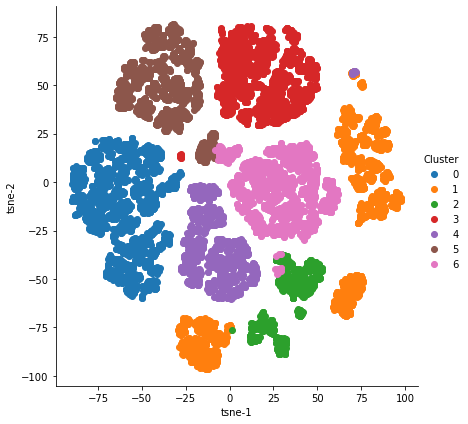

In [27]:
#for K-means clustering
df1 = pd.DataFrame()
df1['tsne-1'] = x_emb[:,0]
df1['tsne-2'] = x_emb[:,1]
df1['Cluster'] = y_km
sns.FacetGrid(df1, hue="Cluster", height=6).map(plt.scatter, "tsne-1","tsne-2").add_legend()

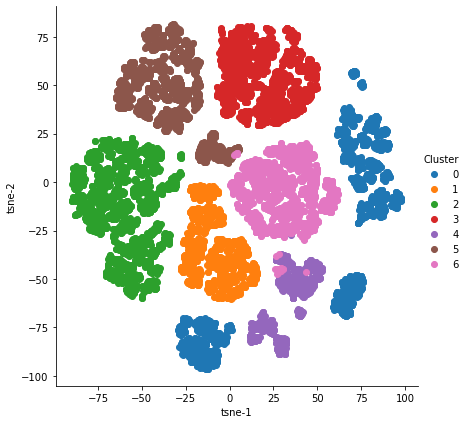

In [28]:
#for agglomerative clustering
df2 = pd.DataFrame()
df2['tsne-1'] = x_emb[:,0]
df2['tsne-2'] = x_emb[:,1]
df2['Cluster'] = y_am
sns.FacetGrid(df2, hue="Cluster",height=6).map(plt.scatter, "tsne-1","tsne-2").add_legend()

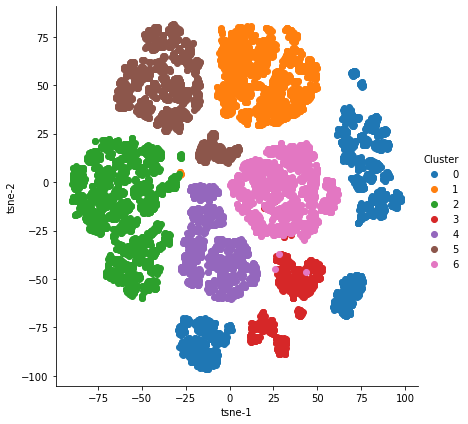

In [29]:
#for BIRCH clustering
df3 = pd.DataFrame()
df3['tsne-1'] = x_emb[:,0]
df3['tsne-2'] = x_emb[:,1]
df3['Cluster'] = y_br
sns.FacetGrid(df3, hue="Cluster", height=6).map(plt.scatter, "tsne-1","tsne-2").add_legend()

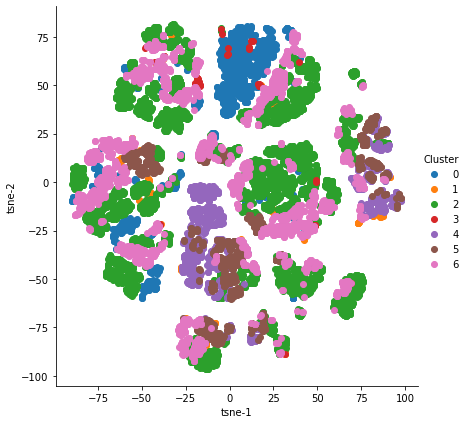

In [30]:
df4 = pd.DataFrame()
df4['tsne-1'] = x_emb[:,0]
df4['tsne-2'] = x_emb[:,1]
df4['Cluster'] = y_gmm
sns.FacetGrid(df4, hue="Cluster", height=6).map(plt.scatter, "tsne-1","tsne-2").add_legend()

# Q1 (3) Cluster distribution with true label count

In [77]:
#assign weights to each label of y(target)
def weight(y):
    length=len(y)
    weights={}
    for i in range(1,8):
        weights[i]= (length/(7*y.value_counts()[i]))%7
        
    return weights

In [78]:
#print the calculated weights
weights=weight(y)
weights

{1: 0.4340953307392996,
 2: 0.3789004457652303,
 3: 1.6903409090909092,
 4: 3.1999999999999993,
 5: 2.9899497487437188,
 6: 2.6020408163265305,
 7: 1.5414507772020725}

In [79]:
#function to check labels in y
def check_label(y):
    count=[0 for _ in range(8)]
    for i in range(1,8):
        try:
            c=np.bincount(y)[i]
        except:
            c=0
        count[i]=c*weights[i]
    return np.argmax(count)

In [80]:
#function for true label count
check_y=check_label(y)
def tl_count(check_y,y):
    for i in range(7):
        print(f"Cluster:{i}")
        add=np.where(check_y==i)[0].tolist()
        add_y=y.iloc[add]
        print(add_y.value_counts())

In [81]:
#value count of each label present in target column
y.value_counts()

2    4711
1    4112
7    1158
3    1056
6     686
5     597
4     175
Name: target, dtype: int64

### K-means clustering distribution with true label count 

In [82]:
#K-means clustering distribution with true label count
tl_count(y_km,y)

Cluster:0
2    1125
1    1018
7     180
5     113
6      43
3      14
Name: target, dtype: int64
Cluster:1
2    973
3    329
1    318
6    250
5    156
4     35
7      3
Name: target, dtype: int64
Cluster:2
2    372
1    304
5     64
3     48
6     46
4     13
7      2
Name: target, dtype: int64
Cluster:3
1    1002
7     814
2     155
Name: target, dtype: int64
Cluster:4
3    665
6    327
2    237
4    127
5     62
1     11
7      5
Name: target, dtype: int64
Cluster:5
2    890
1    578
5    149
7     73
Name: target, dtype: int64
Cluster:6
2    959
1    881
7     81
5     53
6     20
Name: target, dtype: int64


In [83]:
#check the count of datapoints present in each cluster: K-means
dataframe1 = pd.DataFrame()
dataframe1['kmean'] = km.labels_
dataframe1['kmean'].value_counts()

0    2493
1    2064
6    1994
3    1971
5    1690
4    1434
2     849
Name: kmean, dtype: int64

### Agglomerative clustering distribution with true label count

In [84]:
#Agglomerative clustering distribution with true label count
tl_count(y_am,y)

Cluster:0
2    984
3    329
1    318
6    251
5    156
4     35
7      3
Name: target, dtype: int64
Cluster:1
3    665
6    327
2    226
4    127
5     62
1     11
7      5
Name: target, dtype: int64
Cluster:2
2    1133
1    1023
7     180
5     113
6      43
3      14
Name: target, dtype: int64
Cluster:3
1    997
7    814
2    147
Name: target, dtype: int64
Cluster:4
2    371
1    304
5     64
3     48
6     45
4     13
7      2
Name: target, dtype: int64
Cluster:5
2    973
1    592
5    161
7     73
Name: target, dtype: int64
Cluster:6
2    877
1    867
7     81
5     41
6     20
Name: target, dtype: int64


In [85]:
#check the count of datapoints present in each cluster: Agglomerative
dataframe2 = pd.DataFrame()
dataframe2['agglomerative'] = am.labels_
dataframe2['agglomerative'].value_counts()

2    2506
0    2076
3    1958
6    1886
5    1799
1    1423
4     847
Name: agglomerative, dtype: int64

### BIRCH clustering distribution with true label count

In [86]:
#BIRCH clustering distribution with true label count
tl_count(y_br,y)

Cluster:0
2    984
3    329
1    318
6    251
5    156
4     35
7      3
Name: target, dtype: int64
Cluster:1
1    1006
7     820
2     147
Name: target, dtype: int64
Cluster:2
2    1133
1    1014
7     174
5     113
6      43
3      14
Name: target, dtype: int64
Cluster:3
2    376
1    316
5     64
3     48
6     45
4     13
7      4
Name: target, dtype: int64
Cluster:4
3    665
6    327
2    226
4    127
5     62
1     11
7      5
Name: target, dtype: int64
Cluster:5
2    979
1    593
5    161
7     73
Name: target, dtype: int64
Cluster:6
2    866
1    854
7     79
5     41
6     20
Name: target, dtype: int64


In [87]:
#check the count of datapoints present in each cluster: Birch
dataframe3 = pd.DataFrame()
dataframe3['BIRCH'] = br.labels_
dataframe3['BIRCH'].value_counts()

2    2491
0    2076
1    1973
6    1860
5    1806
4    1423
3     866
Name: BIRCH, dtype: int64

### Gaussian mixture clustering distribution with true label count

In [88]:
#Gaussian mixture clustering distribution with true label count
tl_count(y_gmm,y)

Cluster:0
2    29
3    18
6     5
1     3
Name: target, dtype: int64
Cluster:1
2    215
1    109
6     19
5     11
7      7
3      1
Name: target, dtype: int64
Cluster:2
2    1489
1     626
3     518
6     387
5     323
4      32
Name: target, dtype: int64
Cluster:3
3    507
2    277
6    270
4    143
1     60
5      8
7      3
Name: target, dtype: int64
Cluster:4
1    169
7     71
2     50
Name: target, dtype: int64
Cluster:5
2    93
1    67
5    29
7     6
Name: target, dtype: int64
Cluster:6
1    3078
2    2558
7    1071
5     226
3      12
6       5
Name: target, dtype: int64


In [89]:
#check the count of datapoints present in each cluster: Gaussian Mixture 
dataframe4 = pd.DataFrame()
dataframe4['GMM'] = y_gmm
dataframe4['GMM'].value_counts()

6    6950
2    3375
3    1268
1     362
4     290
5     195
0      55
Name: GMM, dtype: int64

# Q1 (4) Comaparision of cluster formation

In [90]:
#rand score for K-means
rand_score(y,km.labels_)

0.6901680089356056

In [91]:
#rand score for agglomerative
rand_score(y,am.labels_)

0.6906230652978336

In [92]:
#rand score for BIRCH
rand_score(y,br.labels_)

0.6908459045535935

In [93]:
#rand score for gaussian mixture
rand_score(y,y_gmm)

0.6016009989717033

# Q2 Prediction of clusters

In [94]:
def map_cl(y_target,y_label):
    cluster_map={}
    for i in range(7):
        add=np.where(y_label==i)[0].tolist()
        y=y_target.iloc[add]
        check_y=check_label(y)
        cluster_map[i]=check_y
    return cluster_map

### Checking which clustering model is giving better mapping
### Gaussian model and K-means are mapping the true labels more accurately

In [95]:
#checking after mapping with GMM
cluster_map=map_cl(y,y_gmm)
cluster_map

{0: 3, 1: 2, 2: 6, 3: 3, 4: 7, 5: 5, 6: 7}

In [96]:
#function to assign clusters
def assign(cluster_map,y_label):
    yp=np.zeros(y_label.shape)
    for i in cluster_map:
        add=np.where(y_label==i)[0].tolist()
        yp[add]=cluster_map[i]
    return yp

In [97]:
yp=assign(cluster_map,y_gmm)
f1_score(y,yp,average='weighted')

0.10842750495934864

In [52]:
#checking after mapping with K-means
cluster_map=map_cl(y,y_km)
cluster_map

{0: 1, 1: 6, 2: 5, 3: 7, 4: 3, 5: 5, 6: 1}

In [53]:
yp=assign(cluster_map,y_km)
f1_score(y,yp,average='weighted')

0.255186767444744

In [54]:
#checking after mapping with Agglomerative clustering
cluster_map=map_cl(y,y_am)
cluster_map

{0: 6, 1: 3, 2: 1, 3: 7, 4: 5, 5: 5, 6: 1}

In [55]:
yp=assign(cluster_map,y_am)
f1_score(y,yp,average='weighted')

0.25665127552418765

In [56]:
#checking after mapping with BIRCH
cluster_map=map_cl(y,y_br)
cluster_map

{0: 6, 1: 7, 2: 1, 3: 5, 4: 3, 5: 5, 6: 1}

In [57]:
yp=assign(cluster_map,y_br)
f1_score(y,yp,average='weighted')

0.2557194604016048

### Gaussian model is giving better score

In [58]:
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.20, random_state=42,stratify=y)

In [59]:
gmm = GaussianMixture(n_components=7)
gmm.fit(x_train)
y_gmm=gmm.predict(x_train)
gmm.cluster_map=map_cl(y_train,y_gmm)

In [ ]:
gmm.cluster_map=map_cl(y,y_gmm)
pickle.dump(gmm, open('model1', 'wb'))

### Checking the performance of the model on the data

In [99]:
def predict(test_set) :
    prediction=[]
    model= pickle.load(open('model1','rb'))
    prediction=model.predict(test_set)
    yp=assign(model.cluster_map,np.array(prediction))
    return yp

In [100]:
y_test.value_counts()

2    942
1    823
7    232
3    211
6    137
5    119
4     35
Name: target, dtype: int64

In [101]:
yp=predict(x_test)

In [102]:
yp1=pd.DataFrame(yp)
yp1.value_counts()

2.0    2156
6.0     279
7.0      44
4.0      14
3.0       6
dtype: int64

In [103]:
f1_score(y_test,yp,average='weighted')

0.22312373457536944

In [105]:
print(classification_report(y_test,yp,zero_division=0))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       823
           2       0.41      0.95      0.58       942
           3       0.00      0.00      0.00       211
           4       0.00      0.00      0.00        35
           5       0.00      0.00      0.00       119
           6       0.00      0.00      0.00       137
           7       0.20      0.04      0.07       232

    accuracy                           0.36      2499
   macro avg       0.09      0.14      0.09      2499
weighted avg       0.17      0.36      0.22      2499



# PREDICT FUNCTION

In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from sklearn.mixture import GaussianMixture
from sklearn.metrics.cluster import rand_score
from scipy.stats import mode
import pickle
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [107]:
def assign(cluster_map,y_label):
    yp=np.zeros(y_label.shape)
    for i in cluster_map:
        add=np.where(y_label==i)[0].tolist()
        yp[add]=cluster_map[i]
    return yp

In [108]:
def predict(test_set) :
    prediction=[]
    model= pickle.load(open('final_model','rb'))
    testpd=pd.read_csv(test_set)
    testpd=pd.get_dummies(testpd)
    prediction=model.predict(testpd)
    yp=assign(model.cluster_map,np.array(prediction))
    return yp

In [ ]:
#predict('test.csv')